**Step 1. Initial Setup and Loading the Data**


In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame
df = pd.read_csv('Superstore_dataset.csv')


In [40]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Step 2. Filter Relevant Columns**

In [41]:
# Select only the relevant columns
df = df[['Sales', 'Profit', 'Quantity', 'Discount']]
# Display the first few rows to check the data
df.head()

,Sales,Profit,Quantity,Discount
0,261.9600,41.9136,2,0.00
1,731.9400,219.5820,3,0.00
2,14.6200,6.8714,2,0.00
3,957.5775,-383.0310,5,0.45
4,22.3680,2.5164,2,0.20


**Step 3. Analyze Overall Trends**

In [42]:
# Summary statistics
print(df.describe())

              Sales       Profit     Quantity     Discount
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001    28.656896     3.789574     0.156203
std      623.245101   234.260108     2.225110     0.206452
min        0.444000 -6599.978000     1.000000     0.000000
25%       17.280000     1.728750     2.000000     0.000000
50%       54.490000     8.666500     3.000000     0.200000
75%      209.940000    29.364000     5.000000     0.200000
max    22638.480000  8399.976000    14.000000     0.800000


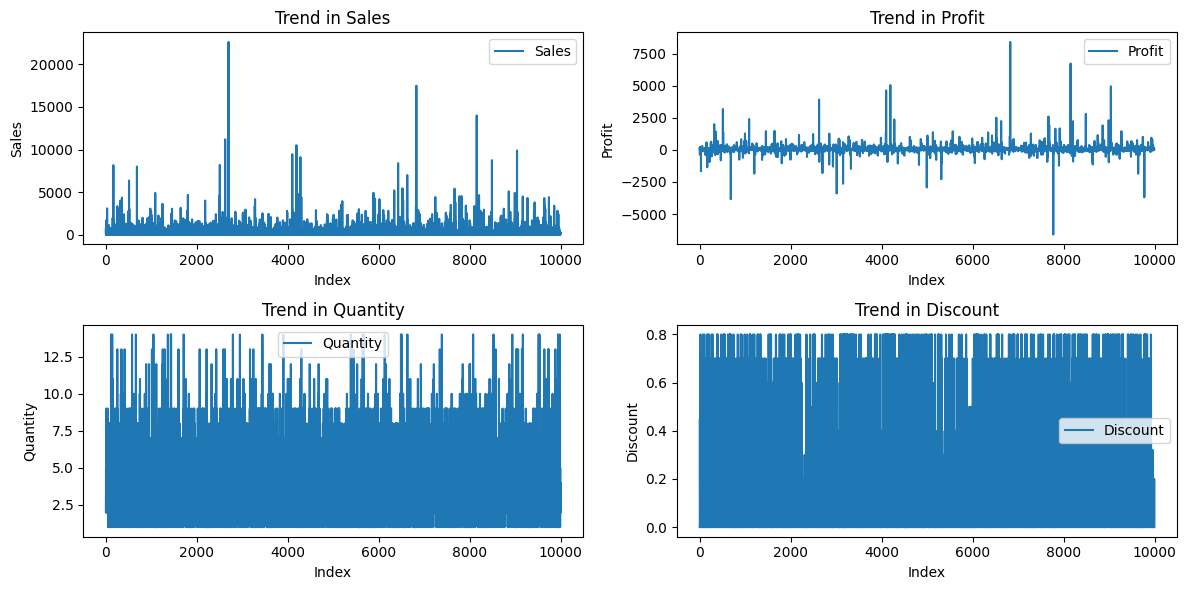

In [43]:
# Plot each column to visualize trends
plt.figure(figsize=(12, 6))
for i, column in enumerate(['Sales', 'Profit', 'Quantity', 'Discount'], 1):
    plt.subplot(2, 2, i)
    plt.plot(df[column], label=column)
    plt.title(f'Trend in {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
plt.tight_layout()
plt.show()

**Step 4. Identify and Handle Missing Values**

In [44]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Sales       0
Profit      0
Quantity    0
Discount    0
dtype: int64


In [45]:
# Handle missing values (fill with median)
df.fillna(df.median(), inplace=True)

In [46]:
# Verify if missing values are handled
print("Missing values after filling:\n", df.isnull().sum())

Missing values after filling:
 Sales       0
Profit      0
Quantity    0
Discount    0
dtype: int64


**Step 5. Apply Moving Average for Smoothing**

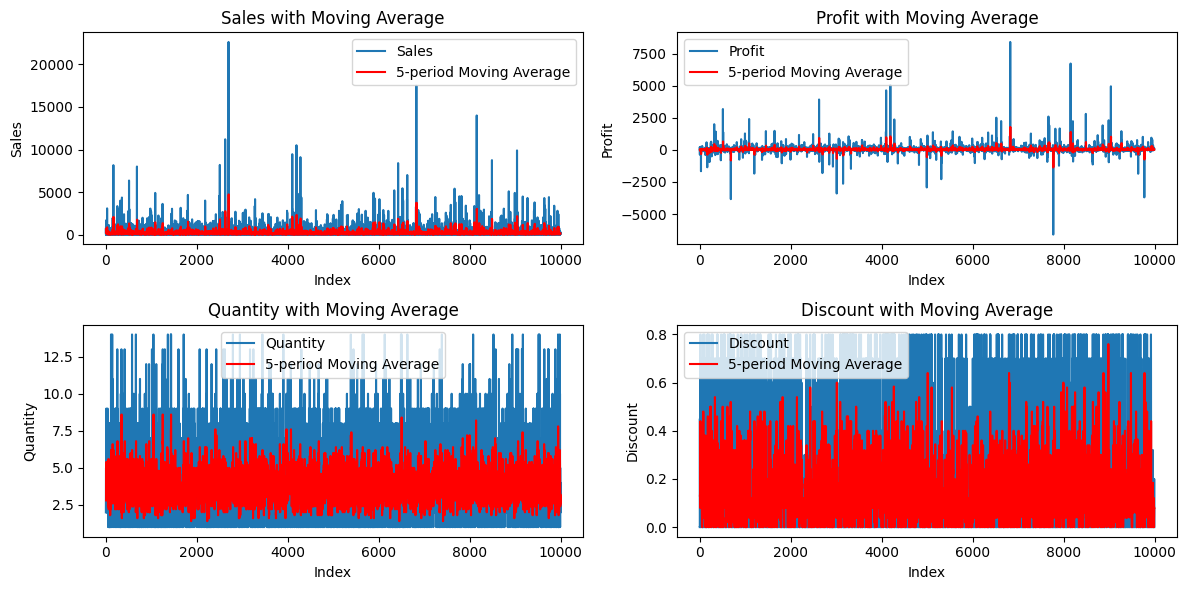

In [47]:
# Define window size for moving average
window_size = 5

# Apply moving average and plot each feature with its moving average
plt.figure(figsize=(12, 6))
for i, column in enumerate(['Sales', 'Profit', 'Quantity', 'Discount'], 1):
    plt.subplot(2, 2, i)
    plt.plot(df[column], label=column)
    plt.plot(df[column].rolling(window=window_size).mean(), label=f'{window_size}-period Moving Average', color='red')
    plt.title(f'{column} with Moving Average')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
plt.tight_layout()
plt.show()


**Step 6. Identify and Describe Outliers**

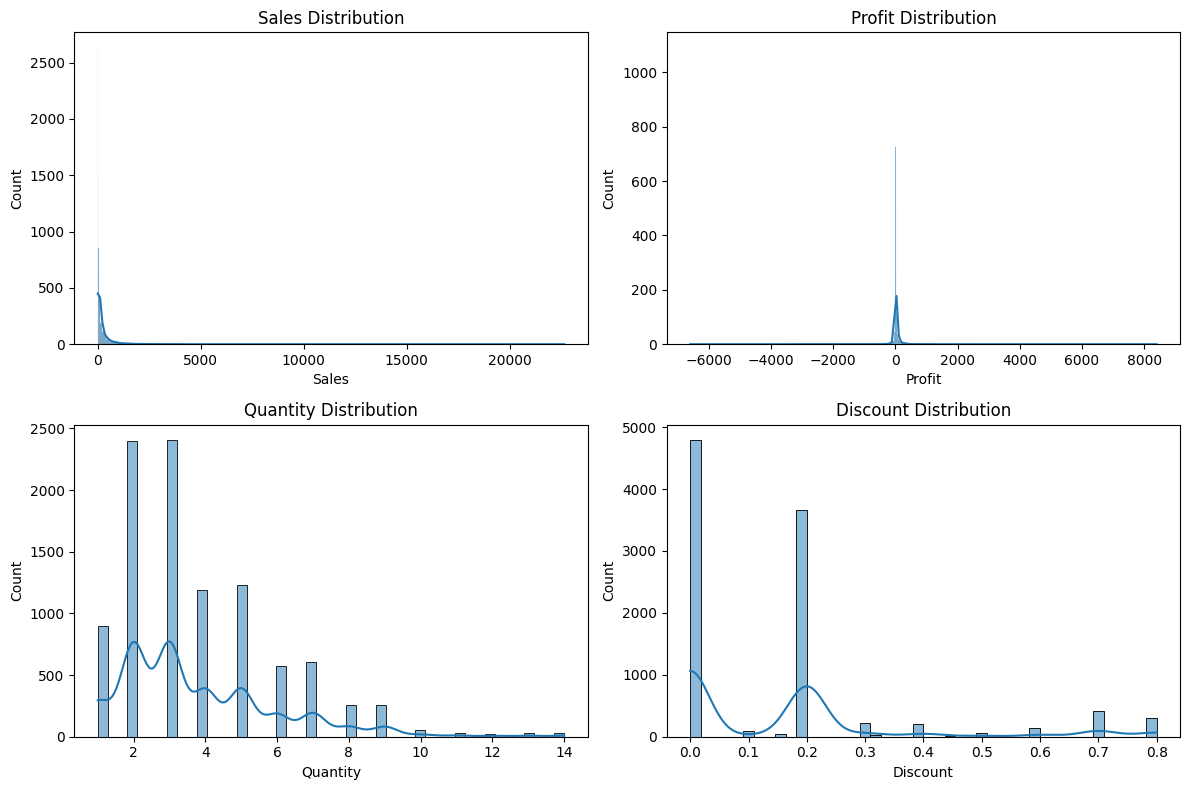

In [48]:
# Histogram to visualize distribution and spot outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(['Sales', 'Profit', 'Quantity', 'Discount'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

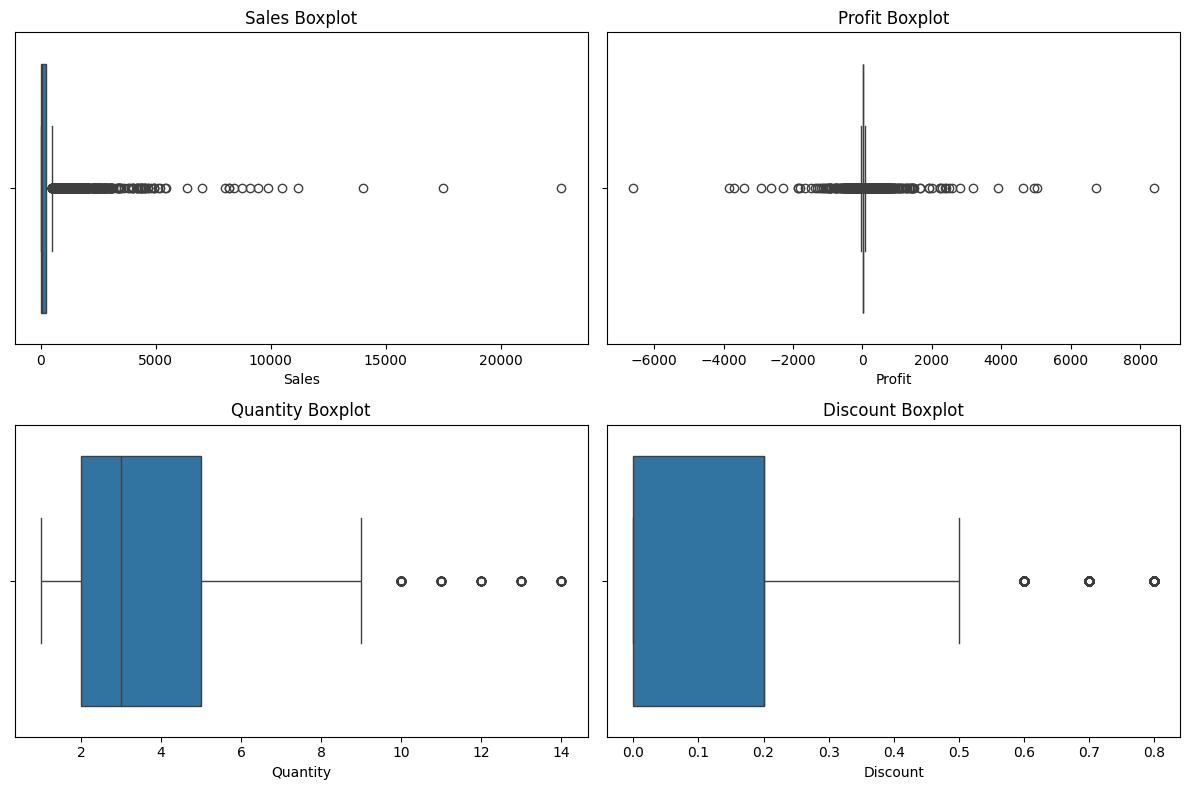

In [49]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 8))
for i, column in enumerate(['Sales', 'Profit', 'Quantity', 'Discount'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'{column} Boxplot')
plt.tight_layout()
plt.show()

**Step 7. Correlation Analysis**

In [50]:
# Calculate and display correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
              Sales    Profit  Quantity  Discount
Sales     1.000000  0.479064  0.200795 -0.028190
Profit    0.479064  1.000000  0.066253 -0.219487
Quantity  0.200795  0.066253  1.000000  0.008623
Discount -0.028190 -0.219487  0.008623  1.000000


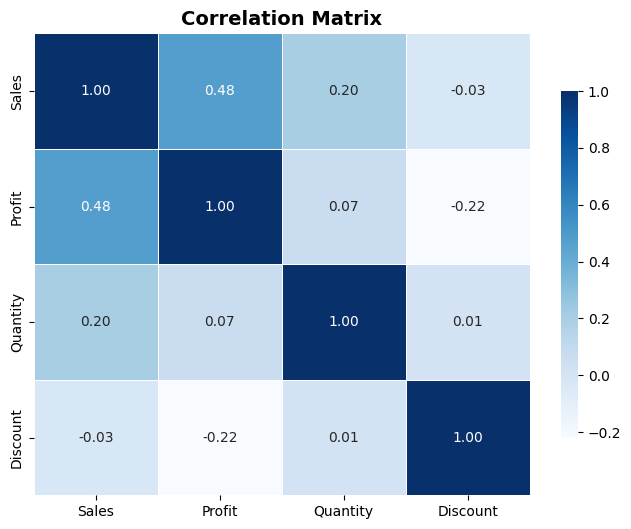

In [51]:
# Plot a clean heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='Blues',
    annot_kws={'size': 10},
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.75}
)
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()